In [12]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from tqdm import tqdm
from pycaret.classification import *
from zipfile import ZipFile
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
trn_y_path = "../downloads/train_y_v0.1.0.csv"
trn_x_path = "../downloads/train_X_v0.1.0.zip"
tst_x_path = "../downloads/test_X_v0.1.0.zip"

In [ ]:
zipf = ZipFile(trn_x_path, 'r')

In [30]:
zipftest = ZipFile(tst_x_path, 'r')

In [31]:
listtestfile = zipftest.namelist()[1:]

In [8]:
train_y = pd.read_csv(trn_y_path)

In [9]:
train_y.filename[1130]

'train_X1130.pkl'

In [35]:
listtestfile[178350]

'test_X/test_X297620.pkl'

In [37]:
len(pickle.loads(zipftest.read("test_X/test_X304021.pkl"))['v'])

439

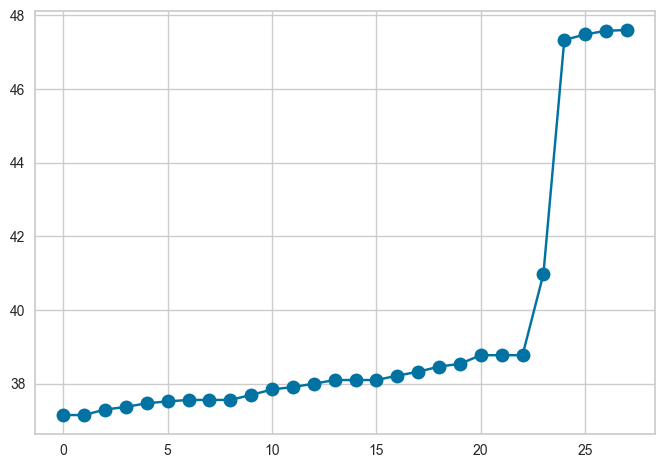

In [25]:
t = pickle.loads(zipf.read('train_X/'+train_y.filename[1130]))['t'].astype('timedelta64[s]').astype(int)
v = pickle.loads(zipf.read('train_X/'+train_y.filename[1130]))['v']
plt.plot(v, marker=".", markersize=20)
plt.show()